<a href="https://colab.research.google.com/github/tbahng/Share/blob/master/TemplateMatchingExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IST 718 Week 8 8.9 Code Creation
This notebook is a demonstration of template matching.

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# set working directory
import os
#os.listdir('drive/My Drive/IST 718')
wd = 'drive/My Drive/IST 718/Template Matching'
os.listdir(wd)

['FindingChickens.ipynb', '.ipynb_checkpoints', 'Images']

In [5]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [9]:
# read in the images
img_rgb = cv2.imread(wd + '/Images/20170815Close.jpg') # color source image
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) # convert color source image to grayscale
template = cv2.imread(wd +'/Images/ChickenPatch.jpg',0) # color template image
w, h = template.shape[::-1]

## Approach 1: High Threshold

In [15]:
# compare template against overlapped image regions using CCOEFF_NORMED method
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.99
loc = np.where(res >= threshold)

In [20]:
f = set()
# put bounding box around matched image in source image
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
  sensitivity = 100
  f.add((round(pt[0] / sensitivity), round(pt[1] / sensitivity)))

cv2.imwrite(wd + '/Images/Found1.png', img_rgb) # source image with boundary around found image

found_count = len(f)
print("how many matching images were found?:", found_count)

how many matching images were found?: 1


Populating the interactive namespace from numpy and matplotlib


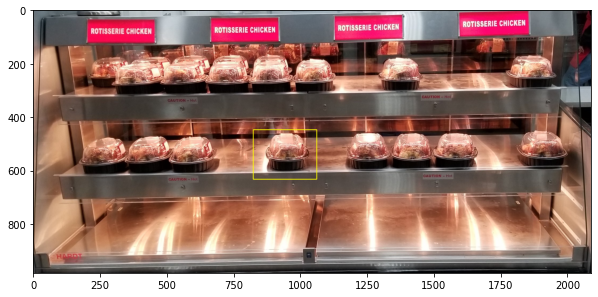

In [26]:
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread(wd + '/Images/Found1.png')
imgplot = plt.imshow(img)
plt.gcf().set_size_inches(10,5)
plt.show()

## Approach 2: Lower Threshold
Setting lower threshold will return multiple matches. Not good for counting unless each match is exact to patch.

In [22]:
# compare template against overlapped image regions using CCOEFF_NORMED method
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.55
loc = np.where(res >= threshold)

f = set()
# put bounding box around matched image(s) in source image
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
  sensitivity = 100
  f.add((round(pt[0] / sensitivity), round(pt[1] / sensitivity)))

cv2.imwrite(wd + '/Images/FoundMany.png', img_rgb) # source image with boundaries around found images

found_count = len(f)
print("how many matching images were found?:", found_count)

how many matching images were found?: 13


Populating the interactive namespace from numpy and matplotlib


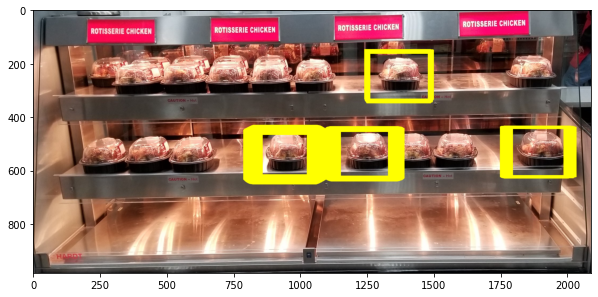

In [27]:
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread(wd + '/Images/FoundMany.png')
imgplot = plt.imshow(img)
plt.gcf().set_size_inches(10,5)
plt.show()

## Comparing Different Methods for Matching in OpenCV

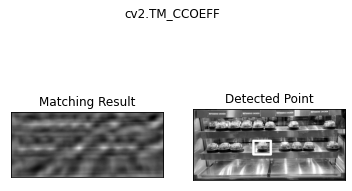

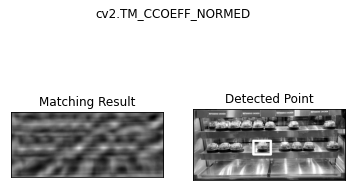

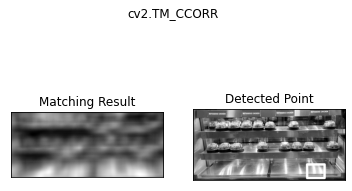

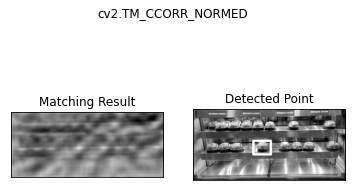

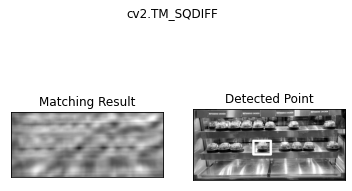

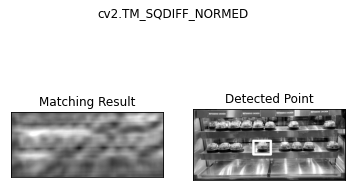

CPU times: user 3.55 s, sys: 32.8 ms, total: 3.58 s
Wall time: 3.6 s


In [37]:
%%time
# variation based on opencv tutorials
# all the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# reload new images
img_rgb = cv2.imread(wd + '/Images/20170815Close.jpg', 0) # source image
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(wd + '/Images/ChickenPatch.jpg', 0) # template image
w, h = template.shape[::-1]

# iterate over the different methods
for meth in methods:
  img = img_rgb.copy() # copy source image array
  method = eval(meth) # eval function evaluates the “String” like a python expression and returns the result as an integer
  # apply template matching and draw the bounding box
  res = cv2.matchTemplate(img, template, method)  
  # if the method is TM_SQDIFF or TM_SQDIFF_NORMED then take minimum, else use maximum for the top left coordinate
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  # draw the rectangle
  cv2.rectangle(img, top_left, bottom_right, (255, 255, 0), 32)
  # plot images to compare methods
  plt.subplot(121), plt.imshow(res, cmap = 'gray') # matching result
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img, cmap = 'gray') # detected point
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)
  plt.show()